# Examles of error propigation
Examples are taken from http://ipl.physics.harvard.edu/wp-uploads/2013/03/PS3_Error_Propagation_sp13.pdf and used on MCMC to show how the answers work

## Example 1

Example: suppose you measure the height H of a door and get 2.00 ± 0.03 m. This means that
H = 2.00 m and δH = 0.03 m. The door has a knob which is a height h = 0.88 ± 0.04 m from the bottom
of the door. Then the distance from the doorknob to the top of the door is Q = H − h = 1.12 m. What
is the uncertainty in Q?

Q = 1.12 ± 0.05 m


In [2]:
import numpy as np
import pymc as mc

In [2]:
H = mc.Normal('H', 2.00, (0.03)**-2)
h = mc.Normal('h', 0.88, (0.04)**-2)

@mc.deterministic()
def Q(H=H, h=h):
    return H-h

model = mc.MCMC((H,h,Q))

In [3]:
model.sample(1e4, burn=100, burn_till_tuned=True)
# mc.Matplot.plot(model)
# mc.Matplot.plot(Q)
print(Q.summary())
print("MCMC gives {0:.2f} +/- {1:.2f}, analytic gives {2} +/- {3}".format(np.mean(Q.trace()), np.std(Q.trace()), 1.12, 0.05))

 [-----------------100%-----------------] 14900 of 14900 complete in 1.0 sec
Q:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	1.121            0.05             0.0              [ 1.022  1.221]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.021            1.087           1.12           1.154         1.221
	
None
MCMC gives 1.12 +/- 0.05, analytic gives 1.12 +/- 0.05


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Example 2

Example: a bird flies a distance d = 120 ± 3 m during a time t = 20.0 ± 1.2 s. The average speed of
the bird is v = d/t = 6 m/s. What is the uncertainty of v?

0.39 m/s.

In [4]:
d = mc.Normal('d', 123, (3)**-2)
t = mc.Normal('t', 20.0, (1.2)**-2)

@mc.deterministic()
def v(d=d, t=t):
    return d/t

model = mc.MCMC((d, t, v))

In [5]:
model.sample(1e5, burn=1000, burn_till_tuned=True)
print(v.summary())
print("MCMC gives {0:.2f}, analytic gives {1}".format(np.std(v.trace()), 0.39))

 [-----------------100%-----------------] 104000 of 104000 complete in 8.7 sec
v:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	6.171            0.402            0.001            [ 5.412  6.982]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	5.441            5.89            6.15           6.428         7.017
	
None
MCMC gives 0.40, analytic gives 0.39


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Example 3

Example: the period of an oscillation is measured to be T = 0.20 ± 0.01 s. Thus the frequency is
f = 1/T = 5 Hz. What is the uncertainty in f? Answer: the percent uncertainty in T was 0.01/0.20 = 5%.
Thus the percent uncertainty in f is also 5%, which means that δf = 0.25 Hz. So f = 5.0 ± 0.3 Hz (after
rounding).

f = 5.0 ± 0.3 Hz

In [6]:
T = mc.Normal('T', 0.20, (0.01)**-2)

@mc.deterministic()
def f(T=T):
    return 1/T

model = mc.MCMC((T, f))

In [7]:
model.sample(1e4, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 14900 of 14900 complete in 0.8 sec

In [8]:
print(f.summary())
print("MCMC gives {0:.1f} +/- {1:.1f}, analytic gives {2} +/- {3}".format(np.mean(f.trace()), np.std(f.trace()), 
                                                                          5.0, 0.3))



f:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	5.013            0.25             0.003            [ 4.533  5.514]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	4.55             4.842           5.002          5.174         5.543
	
None
MCMC gives 5.0 +/- 0.2, analytic gives 5.0 +/- 0.3


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Example 4

Example: a ball is tossed straight up into the air with initial speed v0 = 4.0 ± 0.2 m/s. After a time
t = 0.60±0.06 s, the height of the ball is y = v0t−
1
2
gt2 = 0.636 m. What is the uncertainty of y? Assume
g = 9.80 m/s2
(no uncertainty in g).

Thus y would be properly reported as 0.6 ± 0.4 m.

In [9]:
g = 9.80
t = mc.Normal('t', 0.60, (0.06)**-2)
v0 = mc.Normal('v0', 4.0, (0.2)**-2)

@mc.deterministic()
def h(t=t, v0=v0):
    return v0*t - 0.5*g*t**2

model = mc.MCMC((t, v0, h))



In [10]:
model.sample(1e5, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 8.6 sec

In [11]:
print(h.summary())
print("MCMC gives {0:.1f} +/- {1:.1f}, analytic gives {2} +/- {3}".format(np.mean(h.trace()), np.std(h.trace()), 
                                                                          0.6, 0.4))



h:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.619            0.167            0.001            [ 0.28   0.923]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.255            0.517           0.633          0.737         0.905
	
None
MCMC gives 0.6 +/- 0.2, analytic gives 0.6 +/- 0.4


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Example 5
For example, suppose Ann and Billy both measure the speed of a moving ball. Ann measures 3.6±0.2 m/s
and Billy gets 3.3 ± 0.3 m/s. Do the two measurements agree?

D = 0.3 ± 0.4 m/s  so 0 is in the range, they do agree.

In [12]:
A = mc.Normal('A', 3.6, (0.2)**-2)
B = mc.Normal('B', 3.3, (0.3)**-2)

@mc.deterministic()
def D(A=A, B=B):
    return A-B

model = mc.MCMC((A, B, D))

In [13]:
model.sample(1e5, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 8.8 sec

In [14]:
print(D.summary())
print("MCMC gives {0:.1f} +/- {1:.1f}, analytic gives {2} +/- {3}".format(np.mean(D.trace()), np.std(D.trace()), 
                                                                          0.3, 0.4))
# mc.Matplot.plot(model)


D:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.3              0.36             0.001            [-0.419  0.994]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.41            0.058           0.301          0.543         1.004
	
None
MCMC gives 0.3 +/- 0.4, analytic gives 0.3 +/- 0.4


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [15]:
# https://www.lhup.edu/~dsimanek/scenario/errorman/propagat.htm

# Example 6
Example: An angle is measured to be 30° ±0.5°. What is the error in the sine of this angle?

Solution: Use your electronic calculator. The sine of 30° is 0.5; the sine of 30.5° is 0.508; the sine of 29.5° is 0.492. So if the angle is one half degree too large the sine becomes 0.008 larger, and if it were half a degree too small the sine becomes 0.008 smaller. (The change happens to be nearly the same size in both cases.) So the error in the sine would be written ±0.008.

The size of the error in trigonometric functions depends not only on the size of the error in the angle, but also on the size of the angle. A one half degree error in an angle of 90° would give an error of only 0.00004 in the sine.

In [3]:
a = mc.Normal('a', 30.00, (0.5)**-2)

@mc.deterministic()
def sina(a=a):
    return np.sin(np.deg2rad(a))

model = mc.MCMC((a, sina))

 [-----------------100%-----------------] 100000 of 100000 complete in 5.9 sec[-------          18%                  ] 18671 of 100000 complete in 1.0 sec

/Users/blarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)



sina:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.5              0.008            0.0              [ 0.485  0.515]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.485            0.495           0.5            0.505         0.515
	
None
MCMC gives 0.500 +/- 0.008, analytic gives 0.5 +/- 0.008
 [-----------------100%-----------------] 100000 of 100000 complete in 6.1 secCould not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


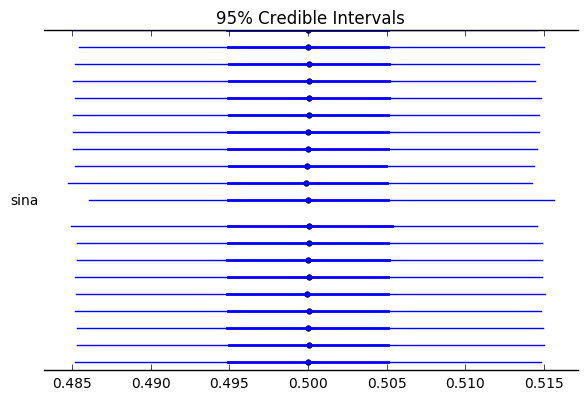

In [14]:
model.sample(1e5, burn=5000, burn_till_tuned=False)
# mc.Matplot.plot(model)
# mc.Matplot.plot(Q)
print(sina.summary())
print("MCMC gives {0:.3f} +/- {1:.3f}, analytic gives {2} +/- {3}".format(np.mean(sina.trace()), np.std(sina.trace()), 0.5, 0.008))

for i in range(4):
    model.sample(1e5, burn=5000, burn_till_tuned=False)

mc.Matplot.summary_plot(sina)

# Example 7
Two data quantities, X and Y, are used to calculate a result, R = XY. X = 38.2 ± 0.3 and Y = 12.1 ± 0.2. What is the error in R?

The product rule requires fractional error measure. The fractional error in X is 0.3/38.2 = 0.008 approximately, and the fractional error in Y is 0.017 approximately. Adding these gives the fractional error in R: 0.025. Multiplying this result by R gives 11.56 as the absolute error in R, so we write the result as R = 462 ± 12. Note that once we know the error, its size tells us how far to round off the result (retaining the first uncertain digit.) Note also that we round off the error itself to one, or at most two, digits. This is why we could safely make approximations during the calculations of the errors.

In [18]:
X = mc.Normal('X', 38.2, (0.3)**-2)
Y = mc.Normal('Y', 12.1, (0.2)**-2)

@mc.deterministic()
def R(X=X, Y=Y):
    return X*Y

model = mc.MCMC((X, Y, R))
model.sample(1e5, burn=5000, burn_till_tuned=False)
# mc.Matplot.plot(model)
# mc.Matplot.plot(Q)
print(R.summary())
print("MCMC gives {0:.3f} +/- {1:.3f}, analytic gives {2} +/- {3}".format(np.mean(R.trace()), np.std(R.trace()), 462, 12))



 [-----------------100%-----------------] 100000 of 100000 complete in 8.3 sec-----            13%                  ] 13233 of 100000 complete in 1.0 sec
R:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	462.189          8.44             0.029        [ 445.572  478.691]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	445.71           456.45          462.165        467.85        478.854
	
None
MCMC gives 462.189 +/- 8.440, analytic gives 462 +/- 12


/Users/blarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
